In [6]:
import numpy as np 
import xarray as xr
import matplotlib.pyplot as plt 
import sys
from pathlib import Path
src_utils_path = Path("../src/utils")
sys.path.append(str(src_utils_path))
import metrics as mjo
import helper as hlp 
import WheelerKiladis_util as wk 

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
fn = ''

In [2]:
fn = '/pscratch/sd/l/linyaoly/MJO_ML_2025/script/model/data/feature_maps/OLR_15deg_lead25_lr0.005_batch32_dropout0.3_ch_32_8_ksize_25_hidden_1024_128_opt_SGD_mom0.9_wd0.005_mem29.nc'
ds = xr.open_dataset(fn)

In [3]:
ds 

<xarray.Dataset>
Dimensions:  (time: 2868, layer1: 32, memory: 30, lon: 144, layer2: 8)
Dimensions without coordinates: time, layer1, memory, lon, layer2
Data variables:
    hid1     (time, layer1, memory, lon) float32 ...
    hid2     (time, layer2, memory, lon) float32 ...

In [4]:
hid2 = ds['hid2'].values

In [7]:
hid2.shape 

(2868, 8, 30, 144)

In [8]:
hid2_power = wk.hovmoller_power(hid2, segsize=30)

coordinates:  ('time', 'lat', 'segments', 'lon')
size of x_roll_sym_asym:  (2868, 8, 30, 144)
size of taper:  (30,)


In [9]:
hid2_power

<xarray.DataArray 'power' (lat: 8, wavenumber: 143, frequency: 14)>
array([[[1.24026076e-08, 4.37708198e-08, 7.50758723e-09, ...,
         1.41120752e-10, 4.50849135e-10, 2.91396476e-10],
        [1.22839735e-08, 4.76417694e-08, 9.45953337e-09, ...,
         1.50515278e-10, 3.77864686e-10, 3.76356820e-10],
        [2.01155221e-08, 5.70259801e-08, 1.02961457e-08, ...,
         1.52535236e-10, 2.87989533e-10, 4.26404403e-10],
        ...,
        [7.00903489e-08, 8.32321992e-08, 1.09594892e-08, ...,
         6.40547071e-10, 4.48439222e-10, 3.99766465e-10],
        [7.89911317e-08, 7.97121021e-08, 8.54893705e-09, ...,
         4.88283928e-10, 2.07744574e-10, 4.07781585e-10],
        [5.99498013e-08, 6.62805785e-08, 6.68667601e-09, ...,
         3.12832076e-10, 2.38468808e-10, 3.43494522e-10]],

       [[2.08552157e-08, 1.37598012e-07, 3.40494094e-08, ...,
         9.22585912e-10, 1.71457116e-09, 1.58782105e-09],
        [2.39047072e-08, 1.13022599e-07, 3.22755188e-08, ...,
         7.65045993e-10, 1.83058934e-09, 1.36819888e-09],
        [3.44405831e-08, 1.05910894e-07, 2.59215903e-08, ...,
         5.76856164e-10, 1.61399436e-09, 1.11946700e-09],
...
        [7.66969132e-08, 5.39710420e-08, 1.34039008e-08, ...,
         5.35026004e-10, 1.67547327e-09, 3.93018948e-10],
        [9.91562325e-08, 6.39027112e-08, 1.62015685e-08, ...,
         4.52995149e-10, 1.17003961e-09, 2.83221272e-10],
        [1.18089670e-07, 7.53923031e-08, 1.85989217e-08, ...,
         4.47284278e-10, 7.24028477e-10, 1.69362761e-10]],

       [[5.08948845e-08, 2.65450895e-08, 1.60104337e-08, ...,
         2.53988963e-10, 9.72928140e-11, 5.20718006e-10],
        [5.90256908e-08, 2.32249307e-08, 1.71627551e-08, ...,
         5.11079668e-10, 1.08088786e-10, 6.50755998e-10],
        [5.89510312e-08, 1.84330257e-08, 1.76446885e-08, ...,
         9.07285566e-10, 1.56322933e-10, 7.65353721e-10],
        ...,
        [4.80364642e-08, 3.79935653e-08, 1.09321975e-08, ...,
         2.02975475e-10, 2.91948265e-10, 1.44480337e-10],
        [4.29405051e-08, 3.81078443e-08, 1.29280019e-08, ...,
         1.30678306e-10, 4.12570976e-10, 1.65168038e-10],
        [3.78102249e-08, 3.30035077e-08, 1.43510888e-08, ...,
         1.15804391e-10, 3.76173515e-10, 3.18778889e-10]]])
Coordinates:
  * lat         (lat) int64 0 1 2 3 4 5 6 7
  * wavenumber  (wavenumber) int64 -71 -70 -69 -68 -67 -66 ... 66 67 68 69 70 71
  * frequency   (frequency) float64 0.03333 0.06667 0.1 ... 0.4 0.4333 0.4667

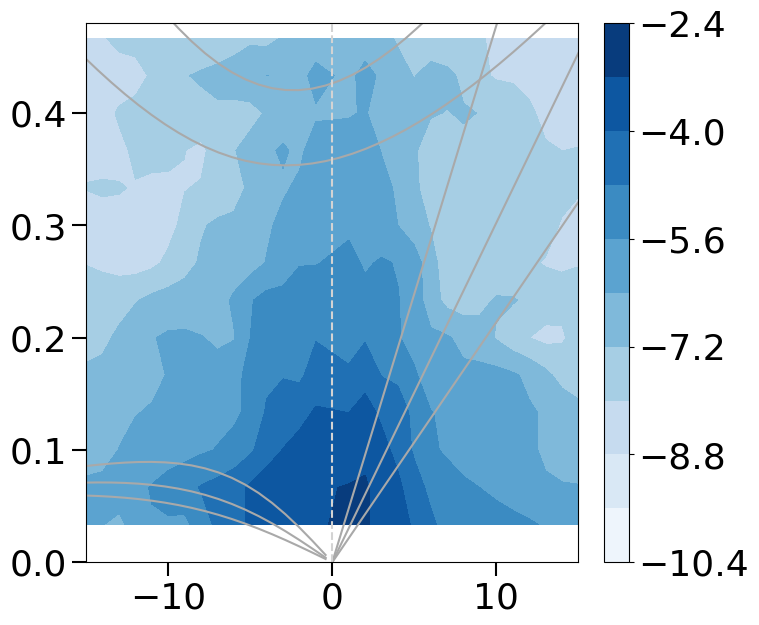

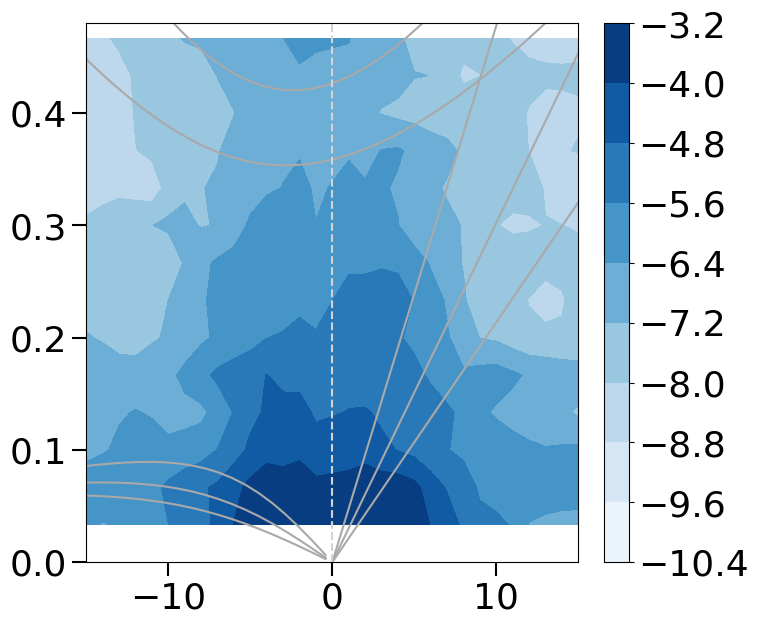

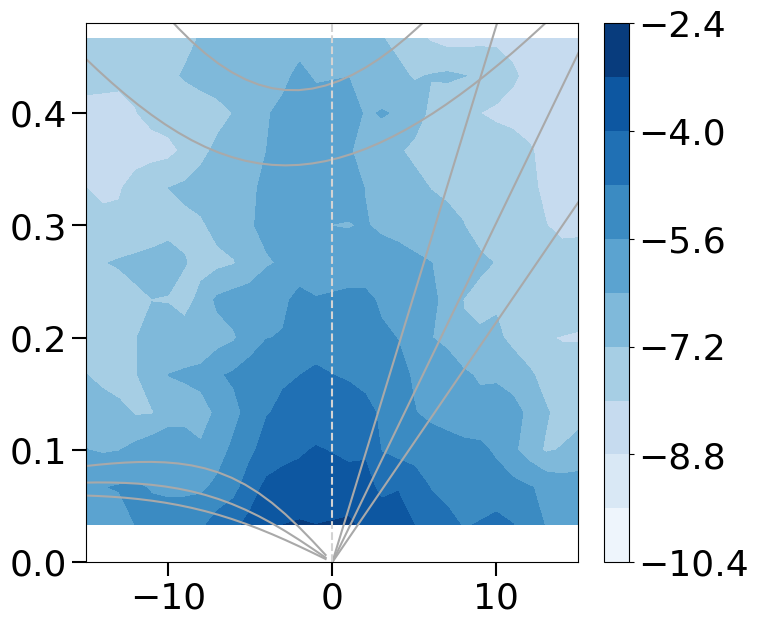

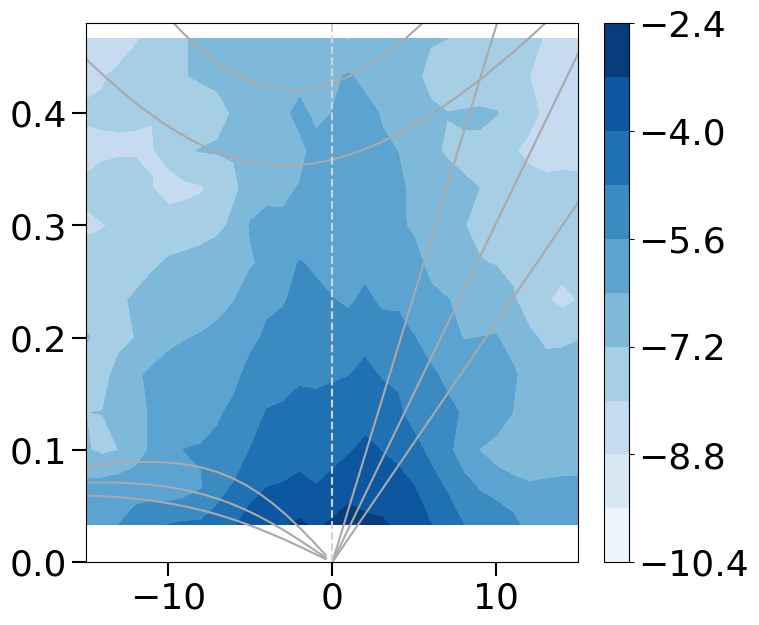

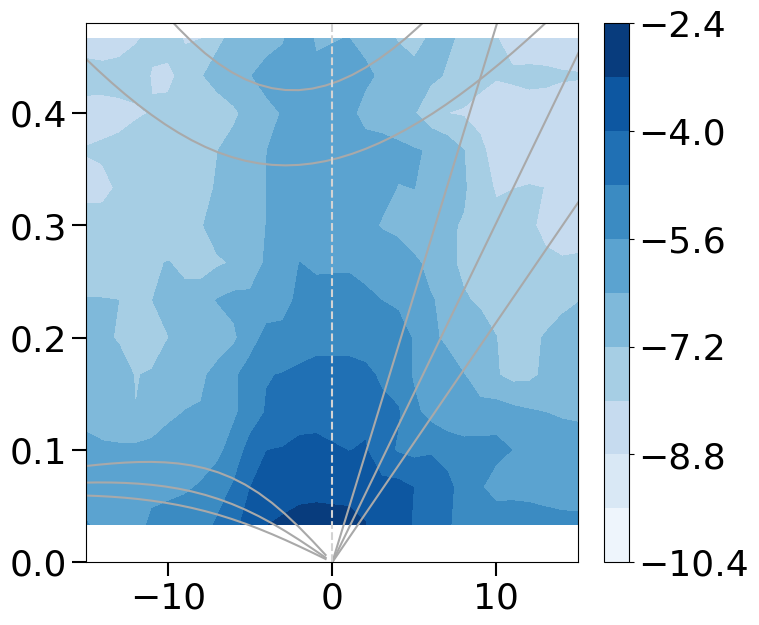

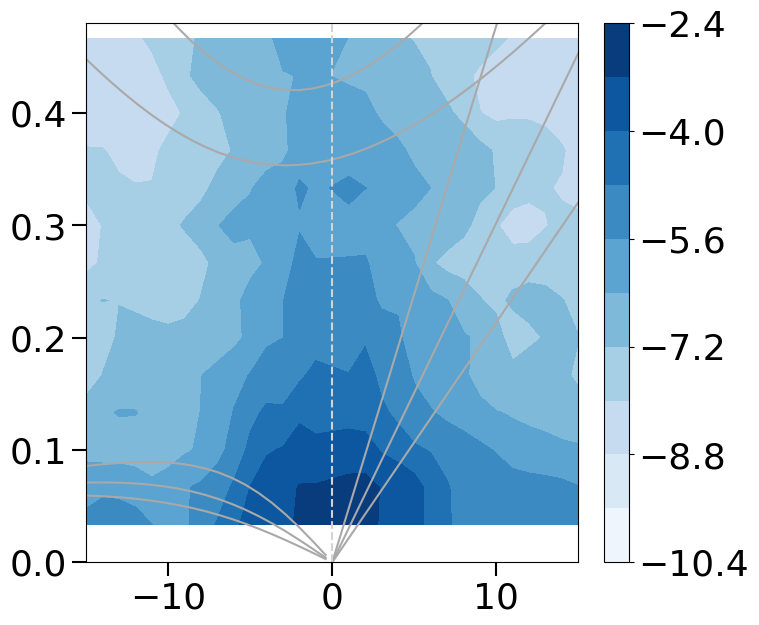

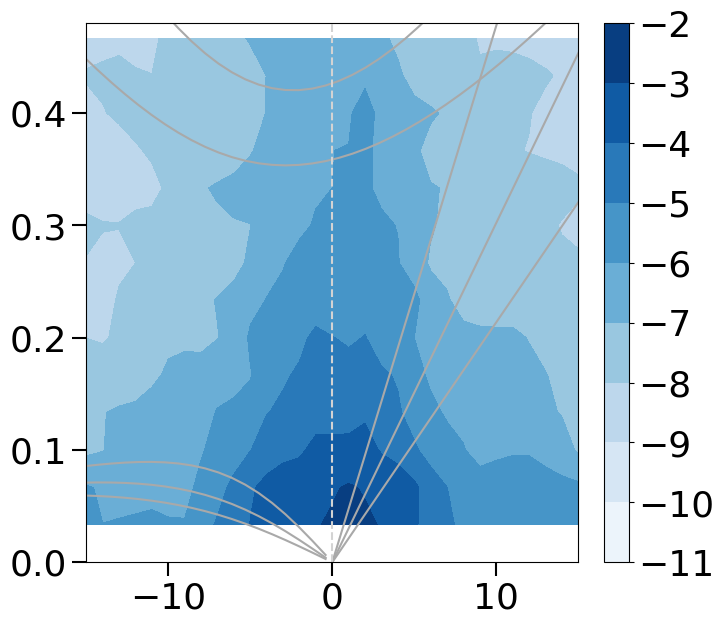

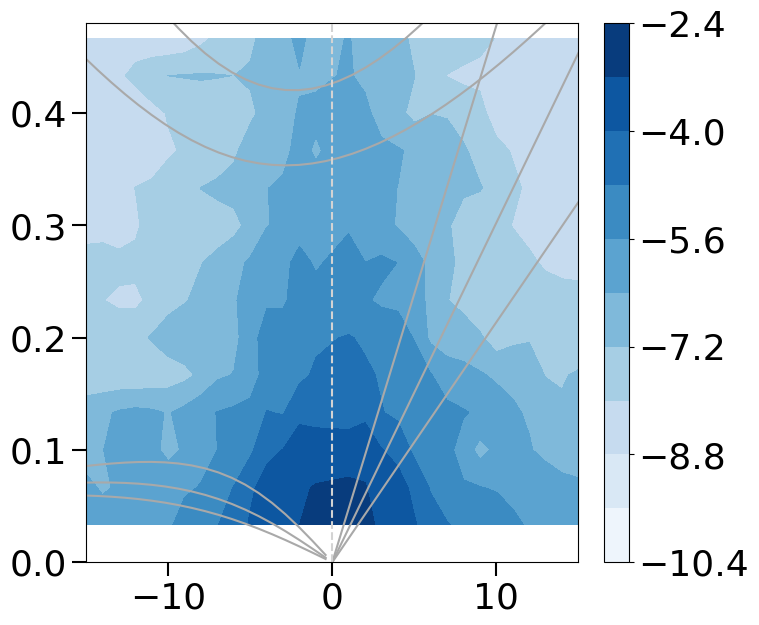

In [20]:
for i in np.arange(8):
    data = hid2_power.sel(lat=i)
    wk.wk_plot_sym(data.where(data.wavenumber != 0, drop=True))